# Bagian 1


## Import Library

---



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder,  MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## Baca Data File

---



In [ ]:
df = pd.read_csv("calonpembelimobil.csv")
df

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1
...,...,...,...,...,...,...,...
995,996,51,0,1,2,293,1
996,997,61,1,0,2,275,1
997,998,45,1,0,0,406,1
998,999,48,0,1,2,432,1


# Bagian 2

## 1. Data Cleaning

### Melakukan Pemeriksaan Apakah Ada Yang Perlu Di Cleaning?

---



In [ ]:
print(f"Data yang bernilai null : \n {df.isnull().sum()}")
print(f"Data yang duplikat : \n {df.duplicated().sum()}")
print(f"Data untuk handling outlier : \n")
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print(outliers)

Data yang bernilai null : 
 ID                0
Usia              0
Status            0
Kelamin           0
Memiliki_Mobil    0
Penghasilan       0
Beli_Mobil        0
dtype: int64
Data yang duplikat : 
 0
Data untuk handling outlier : 

ID                0
Usia              2
Status            0
Kelamin           0
Memiliki_Mobil    0
Penghasilan       0
Beli_Mobil        0
dtype: int64


### Terdapat Data Yang Perlu di Cleaning pada Outlier


---



In [ ]:
Q1 = df['Usia'].quantile(0.25)
Q3 = df['Usia'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Usia'] < lower_bound) | (df['Usia'] > upper_bound)]
print(outliers)

      ID  Usia  Status  Kelamin  Memiliki_Mobil  Penghasilan  Beli_Mobil
200  201   164       0        0               0          100           0
227  228   131       2        1               0          100           0


### Melakukan Cleaning

---



In [ ]:
Q1 = df['Usia'].quantile(0.25)
Q3 = df['Usia'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

cleaned_df = df[(df['Usia'] >= lower_bound) & (df['Usia'] <= upper_bound)]

### Cek Data Setelah di Cleaning

---



In [ ]:
df = cleaned_df
print(f"Data setelah cleaning outlier : \n")
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print(outliers)

Data setelah cleaning outlier : 

ID                0
Usia              0
Status            0
Kelamin           0
Memiliki_Mobil    0
Penghasilan       0
Beli_Mobil        0
dtype: int64


## 2. Normalisasi / Standarisasi Kolom Numerik

### Menampilkan Data setelah di Standarisasi atau Normalisasi

---



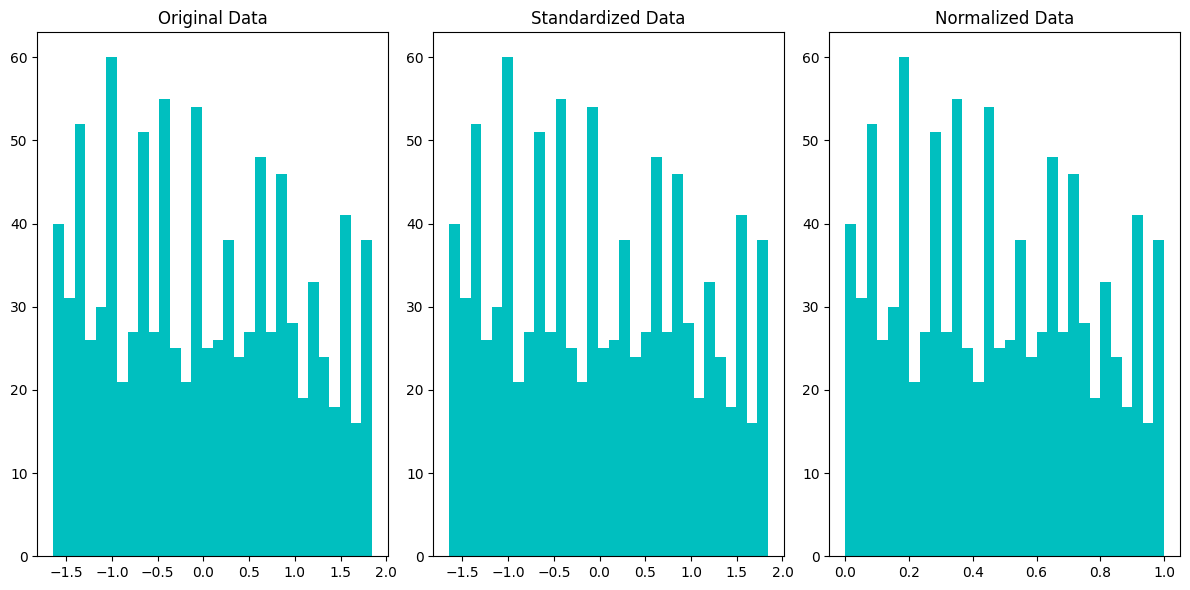

In [ ]:
kolom = 'Usia'

# Standardization
scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[kolom] = scaler.fit_transform(df[[kolom]])

# Normalization
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[kolom] = scaler.fit_transform(df[[kolom]])

# Display
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.hist(df[kolom], bins=30, color='c')
plt.title('Original Data')
plt.subplot(1, 3, 2)
plt.hist(df_standardized[kolom], bins=30, color='c')
plt.title('Standardized Data')
plt.subplot(1, 3, 3)
plt.hist(df_normalized[kolom], bins=30, color='c')
plt.title('Normalized Data')
plt.tight_layout()
plt.show()

## 3. Encoding Kategorikal

### Melakukan Encoding

In [ ]:
encoder = LabelEncoder()
df[['Status', 'Kelamin', 'Memiliki_Mobil', 'Beli_Mobil']] = df[['Status', 'Kelamin', 'Memiliki_Mobil', 'Beli_Mobil']].apply(encoder.fit_transform)

<ipython-input-27-52ba0fa6fbe0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Status', 'Kelamin', 'Memiliki_Mobil', 'Beli_Mobil']] = df[['Status', 'Kelamin', 'Memiliki_Mobil', 'Beli_Mobil']].apply(encoder.fit_transform)


### Menampilkan Data Setelah Encoding

In [ ]:

print(df)


       ID      Usia  Status  Kelamin  Memiliki_Mobil  Penghasilan  Beli_Mobil
0       1 -0.962221       1        0               0    -0.320395           1
1       2  0.482345       2        1               1    -1.794402           0
2       3  0.737269       1        0               2    -0.215109           1
3       4 -1.472068       2        1               1    -1.478544           0
4       5  0.142447       3        0               2    -0.351981           1
..    ...       ...     ...      ...             ...          ...         ...
995   996  0.652294       0        1               2     0.237622           1
996   997  1.502039       1        0               2     0.048107           1
997   998  0.142447       1        0               0     1.427356           1
998   999  0.397371       0        1               2     1.701101           1
999  1000 -0.282425       3        1               1     1.153612           1

[998 rows x 7 columns]


## 4. Feature Engineering

### Membuat Kolom Baru

In [ ]:
df['Income_Age_Ratio'] = df['Penghasilan'] / df['Usia']

<ipython-input-29-18fe867f2e7a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Income_Age_Ratio'] = df['Penghasilan'] / df['Usia']


### Melihat Data Setelah Menambah Kolom Baru

In [ ]:
print(df)

       ID      Usia  Status  Kelamin  Memiliki_Mobil  Penghasilan  Beli_Mobil  \
0       1 -0.962221       1        0               0    -0.320395           1   
1       2  0.482345       2        1               1    -1.794402           0   
2       3  0.737269       1        0               2    -0.215109           1   
3       4 -1.472068       2        1               1    -1.478544           0   
4       5  0.142447       3        0               2    -0.351981           1   
..    ...       ...     ...      ...             ...          ...         ...   
995   996  0.652294       0        1               2     0.237622           1   
996   997  1.502039       1        0               2     0.048107           1   
997   998  0.142447       1        0               0     1.427356           1   
998   999  0.397371       0        1               2     1.701101           1   
999  1000 -0.282425       3        1               1     1.153612           1   

     Income_Age_Ratio  
0  

## 5. Splitting data ke dalam data training & data testing

---



In [ ]:
X = df.drop('Beli_Mobil', axis=1)
y = df['Beli_Mobil']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



### Menampilkan Data Training dan Data Testing

In [ ]:
# Menampilkan set pelatihan
print("X_train:")
print(X_train)
print("\ny_train:")
print(y_train)

# Menampilkan set pengujian
print("\nX_test:")
print(X_test)
print("\ny_test:")
print(y_test)


X_train:
      ID      Usia  Status  Kelamin  Memiliki_Mobil  Penghasilan  \
745  746 -0.197451       0        0               0     0.342908   
288  289 -0.282425       0        0               0     1.301013   
165  166 -1.387093       1        0               0    -0.699426   
961  962 -1.557042       0        1               0    -1.510129   
495  496  1.671988       0        0               2    -1.341672   
..   ...       ...     ...      ...             ...          ...   
106  107  0.652294       2        0               1    -0.204580   
272  273  0.907218       3        0               0     1.532643   
862  863 -0.622323       2        0               1     0.511366   
437  438  1.671988       0        0               0     0.216565   
102  103 -1.047196       1        1               1    -1.110042   

     Income_Age_Ratio  
745         -1.736677  
288         -4.606575  
165          0.504238  
961          0.969870  
495         -0.802441  
..                ...  
106   